In [1]:
import numpy as np
from sound import *
import matplotlib.pyplot as plt
%matplotlib inline

x, fs = wavread('speech8kHz.wav')

('Number of channels: ', 1)
('Number of bytes per sample:', 2)
('Sampling rate: ', 8000)
('Number of samples:', 60246)


* Normalized float, -1<x<1

In [2]:
x = np.array(x,dtype=float)/2**15
print (np.size(x))
e = np.zeros(np.size(x))
h = np.zeros(10)

60246


In [3]:
for n in range(10, len(x)):
    
    #prediction error and filter, using the vector of the time reversed IR:
    e[n] = x[n] - np.dot(x[n-10+np.arange(0,10)], np.flipud(h))
    
    #LMS update rule, according to the definition above:
    h = h + 1.0* e[n]*np.flipud(x[n-10+np.arange(0,10)])

In [4]:
print ("Mean squared prediction error:", np.dot(e, e) /np.max(np.size(e)))

('Mean squared prediction error:', 0.00030295901656285796)


* Listen to to the prediction error:

In [5]:
sound(2**15*e, fs)

* done


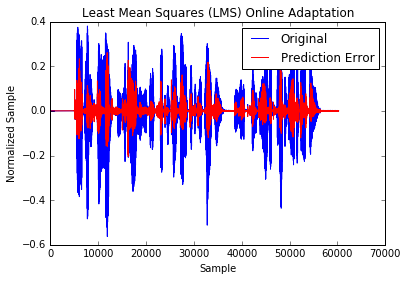

In [6]:
plt.figure()
plt.plot(x)
plt.plot(e,'r')
plt.xlabel('Sample')
plt.ylabel('Normalized Sample')
plt.title('Least Mean Squares (LMS) Online Adaptation')
plt.legend(('Original','Prediction Error'))
plt.show()

**Observe:** its prediction error is bigger than in the **LPC** case, but we also don't need to transmit the prediction coefficients as side information.

The comparison plot of the original to the prediction error(above plot)

* For the **decoder** we get the reconstruction

decoder h:  [ -1.36650874e-05   9.81964536e-06  -5.72557714e-06   2.32909304e-06
  -4.35770302e-07   7.07384488e-08  -2.30022390e-07   2.21651788e-07
  -6.70549385e-08  -1.76020424e-07]
decoder h:  [ -1.36725379e-05   9.81964536e-06  -5.72930239e-06   2.33281830e-06
  -4.39495557e-07   7.81889603e-08  -2.41198158e-07   2.29102300e-07
  -7.45054506e-08  -1.68569912e-07]
decoder h:  [ -1.36874387e-05   9.82709579e-06  -5.72930239e-06   2.33654351e-06
  -4.43220774e-07   8.19141774e-08  -2.48648592e-07   2.40277952e-07
  -8.19558856e-08  -1.61119477e-07]
decoder h:  [ -1.37060648e-05   9.84572185e-06  -5.73861542e-06   2.33654351e-06
  -4.47877287e-07   8.65706904e-08  -2.53305105e-07   2.49590979e-07
  -9.59254259e-08  -1.51806450e-07]
decoder h:  [ -1.37293472e-05   9.86434779e-06  -5.75724136e-06   2.34585649e-06
  -4.47877287e-07   9.12271762e-08  -2.57961591e-07   2.54247464e-07
  -1.05238398e-07  -1.37836991e-07]
decoder h:  [ -1.37433164e-05   9.87831692e-06  -5.76841667e-06   2.35

/home/vrana/.local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in add


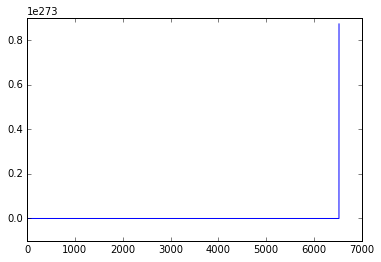

ValueError: cannot convert float NaN to integer

In [7]:
h = np.zeros(10);
xrek = np.zeros(np.size(x));
for n in range(10, len(x)):
    if n> 4000 and n< 4010:
        print "decoder h: ", h
    P=np.dot(xrek[n-10+np.arange(10)], np.flipud(h))
    xrek[n] = e[n] + P 
    #LMS update:
    h = h + 1.0 * e[n]*np.flipud(xrek[n-10+np.arange(10)]);
plt.plot(xrek)
plt.show()
#Listen to the reconstructed signal:
sound(2**15*xrek,fs)

In [ ]:
#Listen to the reconstructed signal:
sound(2**15*xrek, fs)

**Sensitivity** of the decoder for transmission **errors**: In the code for the decoder in the LMS update for the predictor h, correctly we need xrek instead of x (since x is not available in the decoder). The slightest computation errors, for instance **rounding errors**, are sufficient to make the decoder diverge and stop working after a few syllables of the speech. Try it out. We see that the computed **prediction coefficients differ** in the last digits between encoder and
decoder, which is enough for **increasing divergence** between encoder and decoder, until the decoded signal “explodes” (becomes huge from instability). This shows that **LMS is very sensitive to transmission errors.** To avoid at least the computation errors, we need to include quantization in the process.
